Found 16184 images belonging to 2 classes.
Found 4044 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


506/506 ━━━━━━━━━━━━━━━━━━━━ 3335s 7s/step - accuracy: 0.9020 - loss: 0.3351 - val_accuracy: 0.9070 - val_loss: 0.3091
Epoch 2/20
506/506 ━━━━━━━━━━━━━━━━━━━━ 664s 1s/step - accuracy: 0.9083 - loss: 0.3116 - val_accuracy: 0.9070 - val_loss: 0.3055
Epoch 3/20
506/506 ━━━━━━━━━━━━━━━━━━━━ 655s 1s/step - accuracy: 0.9063 - loss: 0.3107 - val_accuracy: 0.9070 - val_loss: 0.3376
Epoch 4/20
506/506 ━━━━━━━━━━━━━━━━━━━━ 651s 1s/step - accuracy: 0.9075 - loss: 0.3049 - val_accuracy: 0.9070 - val_loss: 0.2953
Epoch 5/20
506/506 ━━━━━━━━━━━━━━━━━━━━ 619s 1s/step - accuracy: 0.9073 - loss: 0.2952 - val_accuracy: 0.9070 - val_loss: 0.2952
Epoch 6/20
506/506 ━━━━━━━━━━━━━━━━━━━━ 620s 1s/step - accuracy: 0.9047 - loss: 0.2925 - val_accuracy: 0.9070 - val_loss: 0.2774
Epoch 7/20
506/506 ━━━━━━━━━━━━━━━━━━━━ 615s 1s/step - accuracy: 0.9063 - loss: 0.2835 - val_accuracy: 0.9070 - val_loss: 0.3016
Epoch 8/20
506/506 ━━━━━━━━━━━━━━━━━━━━ 609s 1s/step - accuracy: 0.9032 - loss: 0.2822 - val_accuracy: 0.90

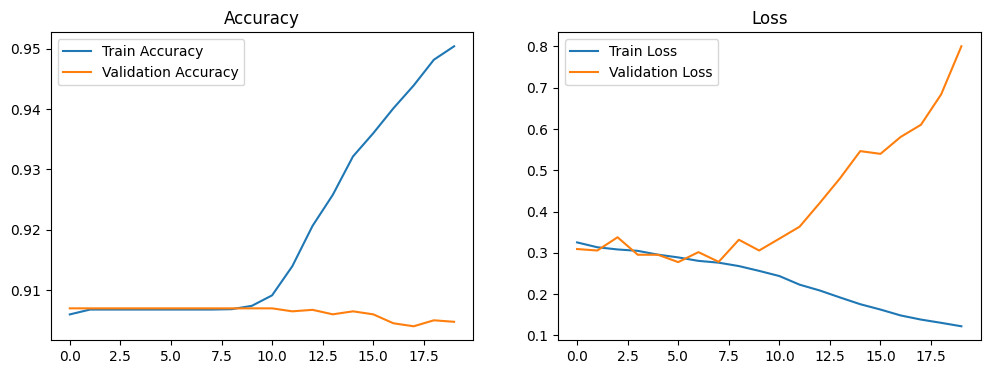

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Data

def load_data(data_directory):

    datagen = ImageDataGenerator(
        rescale=1.0/255.0,
        validation_split=0.2
    )

    train_data = datagen.flow_from_directory(
        data_directory,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        subset='training'
    )

    val_data = datagen.flow_from_directory(
        data_directory,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
    )

    return train_data, val_data

# Step 2: Build Model
def build_model():

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(2, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Step 3: Train Model
def train_model(model, train_data, val_data, epochs=20):

    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=epochs
    )

    return history

# Step 4: Evaluate Model
def evaluate_model(model, val_data):

    val_loss, val_accuracy = model.evaluate(val_data)
    print(f"Validation Loss: {val_loss}")
    print(f"Validation Accuracy: {val_accuracy}")

# Step 5: Plot Results
def plot_results(history):

    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.show()

# Step 6: Main Execution
def main():
    data_directory = "/content/drive/MyDrive/datasetsss/tomatooo/New Plant Diseases Dataset(Augmented)"
    train_data, val_data = load_data(data_directory)

    model = build_model()

    history = train_model(model, train_data, val_data, epochs=20)

    evaluate_model(model, val_data)

    plot_results(history)

    model.save("plant_disease_detection_model.h5")

if __name__ == "__main__":
    main()

In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
